In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0


In [2]:

raw_dataset = pd.read_csv('chicago data summary backfiled(1Y).csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()

features.tail(20)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter
146,5/1/2017,141.847600,4.01,61642,9484.158,4.4,691288.417,1098.86,36.30%,164674,1.80%,1201,1.43,209.999
147,6/1/2017,141.817359,3.90,61642,9484.158,5.1,691288.417,1098.86,36.30%,164674,1.80%,3207,1.43,209.434
148,7/1/2017,141.861185,3.97,61642,9484.158,5.1,691288.417,1098.86,35.80%,164838,1.80%,1140,1.44,210.359
149,8/1/2017,142.383146,3.88,61642,9484.158,5.3,691288.417,1098.86,35.80%,164838,1.80%,1785,1.56,211.010
150,9/1/2017,143.084706,3.81,61642,9484.158,4.6,691288.417,1098.86,35.80%,164838,1.80%,1810,1.79,211.699
151,10/1/2017,143.920804,3.90,61642,9484.158,4.5,691288.417,1098.86,35.50%,164821,1.80%,1895,1.75,210.498
152,11/1/2017,144.291681,3.92,61642,9484.158,4.4,691288.417,1098.86,35.50%,164821,1.80%,1499,1.89,211.096
153,12/1/2017,144.192156,3.95,61642,9484.158,4.4,691288.417,1098.86,35.50%,164821,1.80%,1699,1.94,210.373
154,1/1/2018,144.104591,4.03,61642,9484.158,5.0,691288.417,1006.09,36.00%,164448,1.70%,671,1.96,211.957
155,2/1/2018,144.268701,4.33,63500,9458.539,4.8,709160.008,1006.09,36.00%,164448,1.70%,864,1.99,211.617


In [3]:
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3/1/2005,168.016174,5.93,40731,9362.080,6.2,471401.491,1195.605,177440,4629,1.68,175.2,43.5,1.7
1,4/1/2005,167.616675,5.86,43490,9398.855,6.1,494879.583,1195.605,178915,4585,2.00,177.3,43.5,1.6
2,5/1/2005,167.717165,5.72,43490,9398.855,6.0,494879.583,1195.605,178915,4618,1.43,176.9,43.5,1.6
3,6/1/2005,167.155395,5.58,43490,9398.855,6.4,494879.583,1195.605,178915,4476,1.44,177.0,43.5,1.6
4,7/1/2005,166.556535,5.70,43490,9398.855,6.0,494879.583,1195.605,179553,4920,2.00,177.3,43.4,1.6


In [4]:
features.isna().sum()

Date                                     0
House_Price_Index(S&P/Case-Shiller)      0
Mortgage_Rate (30 yers)                  0
Personal_Income                          0
Resident_Population                      0
Unemployment_Rate                        0
GDP                                      0
Crime_Rate                               0
Median_Debt                              0
New_Structures                           0
Economic_Conditions_Index                0
CPI less shelter                         0
Percent_With_Mortgage_Debt               0
Percent_With_Severely_Delinquent_Debt    0
dtype: int64

In [5]:
features=features.drop('Date',axis=1)
train_dataset = features.iloc[:154]
test_dataset = features.iloc[154:]

In [6]:
train_dataset

,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,168.016174,5.93,40731,9362.080,6.2,471401.491,1195.605,177440,4629,1.68,175.200,43.5,1.7
1,167.616675,5.86,43490,9398.855,6.1,494879.583,1195.605,178915,4585,2.00,177.300,43.5,1.6
2,167.717165,5.72,43490,9398.855,6.0,494879.583,1195.605,178915,4618,1.43,176.900,43.5,1.6
3,167.155395,5.58,43490,9398.855,6.4,494879.583,1195.605,178915,4476,1.44,177.000,43.5,1.6
4,166.556535,5.70,43490,9398.855,6.0,494879.583,1195.605,179553,4920,2.00,177.300,43.4,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,142.383146,3.88,61642,9484.158,5.3,691288.417,1098.860,164838,1785,1.56,211.010,35.8,1.8
150,143.084706,3.81,61642,9484.158,4.6,691288.417,1098.860,164838,1810,1.79,211.699,35.8,1.8
151,143.920804,3.90,61642,9484.158,4.5,691288.417,1098.860,164821,1895,1.75,210.498,35.5,1.8
152,144.291681,3.92,61642,9484.158,4.4,691288.417,1098.860,164821,1499,1.89,211.096,35.5,1.8


In [7]:
train_stats = train_dataset.describe()
train_stats.pop('House_Price_Index(S&P/Case-Shiller)')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),154.0,4.769286,1.037777,3.350,3.9125,4.430,5.85000,6.760
Personal_Income,154.0,50139.746753,5845.471856,40731.000,45919.0000,48761.000,55508.00000,61642.000
Resident_Population,154.0,9511.562338,48.172981,9362.080,9484.1580,9515.636,9550.19400,9580.567
Unemployment_Rate,154.0,7.238312,2.234027,3.700,5.3000,6.400,9.40000,12.200
GDP,154.0,571032.307091,64534.021521,471401.491,513514.0670,561292.438,632200.03300,691288.417
Crime_Rate,154.0,1054.326506,117.625295,884.000,969.1400,1098.860,1178.71400,1208.601
Median_Debt,154.0,178581.090909,10294.266720,164465.000,167603.2500,178915.000,189227.25000,193843.000
New_Structures,154.0,1685.837662,1294.537965,235.000,713.7500,1204.500,2098.00000,5641.000
Economic_Conditions_Index,154.0,1.082792,1.830529,-6.130,1.1175,1.720,2.00750,2.780
CPI less shelter,154.0,199.183299,10.638096,175.200,190.7240,203.751,207.76125,213.749


In [8]:
train_labels = train_dataset.pop('House_Price_Index(S&P/Case-Shiller)')
test_labels = test_dataset.pop('House_Price_Index(S&P/Case-Shiller)')

In [9]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_train_data.head(20)

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1.118462,-1.609579,-3.103033,-0.464771,-1.543849,1.201089,-0.110847,2.273523,0.326249,-2.254473,0.771886,-1.082703
1,1.051011,-1.137589,-2.339638,-0.509534,-1.180040,1.201089,0.032436,2.239534,0.501062,-2.057069,0.771886,-1.129924
2,0.916107,-1.137589,-2.339638,-0.554296,-1.180040,1.201089,0.032436,2.265026,0.189676,-2.094670,0.771886,-1.129924
3,0.781203,-1.137589,-2.339638,-0.375247,-1.180040,1.201089,0.032436,2.155335,0.195139,-2.085270,0.771886,-1.129924
4,0.896835,-1.137589,-2.339638,-0.554296,-1.180040,1.201089,0.094413,2.498314,0.501062,-2.057069,0.739803,-1.129924
5,1.012467,-1.137589,-2.339638,-0.778107,-1.180040,1.201089,0.094413,3.055269,0.391804,-1.897266,0.739803,-1.129924
6,0.964287,-1.137589,-2.339638,-0.778107,-1.180040,1.201089,0.094413,2.480547,0.342637,-1.521259,0.739803,-1.129924
7,1.253366,-1.137589,-2.339638,-0.957156,-1.180040,1.201089,0.322501,2.295153,0.364489,-1.530659,0.643551,-1.129924
8,1.503902,-1.137589,-2.339638,-0.912394,-1.180040,1.201089,0.322501,2.133705,0.419118,-1.643461,0.643551,-1.129924
9,1.446086,-1.137589,-2.339638,-0.957156,-1.180040,1.201089,0.322501,1.778366,0.506525,-1.793864,0.643551,-1.129924


In [10]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [11]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                832       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


In [12]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[0.6635831 ],
       [0.5518329 ],
       [0.5604562 ],
       [0.5496271 ],
       [0.5471655 ],
       [0.5548882 ],
       [0.49570554],
       [0.45701715],
       [0.45767328],
       [0.48621976]], dtype=float32)

In [13]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 400

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

KeyError: 'val_mae'

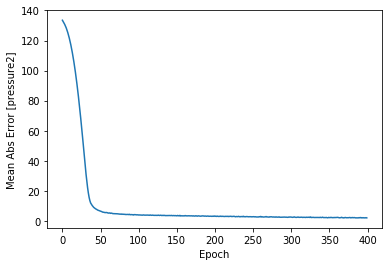

In [14]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [pressure2]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,200])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [pressure2^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,40000])
  plt.legend()
  plt.show()


plot_history(history)

Mean Absolute Error: 4.6
Accuracy: 96.81 %.


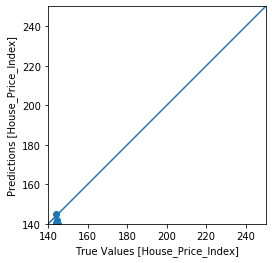

In [15]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 250]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

test_errors = abs(test_predictions - test_labels)


print('Mean Absolute Error:', round(np.mean(test_errors), 2))

mape = np.mean(100 * (test_errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 2.03
Accuracy: 98.5 %.


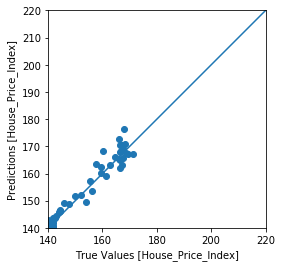

In [16]:
train_predictions = model.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
train_errors = abs(train_predictions - train_labels)


print('Mean Absolute Error:', round(np.mean(train_errors), 2))

mape = np.mean(100 * (train_errors / train_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [17]:
prediction_features=features   #produce prediction result
prediction_features

,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,168.016174,5.93,40731,9362.080,6.2,471401.491,1195.605,177440,4629,1.68,175.200,43.5,1.7
1,167.616675,5.86,43490,9398.855,6.1,494879.583,1195.605,178915,4585,2.00,177.300,43.5,1.6
2,167.717165,5.72,43490,9398.855,6.0,494879.583,1195.605,178915,4618,1.43,176.900,43.5,1.6
3,167.155395,5.58,43490,9398.855,6.4,494879.583,1195.605,178915,4476,1.44,177.000,43.5,1.6
4,166.556535,5.70,43490,9398.855,6.0,494879.583,1195.605,179553,4920,2.00,177.300,43.4,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,144.422443,4.55,63500,9458.539,4.1,709160.008,1006.090,165003,1615,1.51,212.840,35.8,1.4
162,143.719229,4.63,63500,9458.539,3.7,709160.008,1006.090,165003,1583,1.35,213.605,35.8,1.4
163,144.269699,4.83,63500,9458.539,3.9,709160.008,1006.090,165237,1736,1.35,213.241,35.4,1.4
164,144.419653,4.87,63500,9458.539,3.6,709160.008,1006.090,165237,2011,1.44,211.004,35.4,1.4


In [18]:
prediction_features.pop('House_Price_Index(S&P/Case-Shiller)')
normed_prediction_features=norm(prediction_features)
prediction_result=model.predict(normed_prediction_features)
prediction_result=pd.DataFrame(prediction_result)
rawdataset=raw_dataset.join(prediction_result)
rawdataset                              

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,0
0,3/1/2005,168.016174,5.93,40731,9362.080,6.2,471401.491,1195.605,43.50%,177440,1.70%,4629,1.68,175.200,176.383224
1,4/1/2005,167.616675,5.86,43490,9398.855,6.1,494879.583,1195.605,43.50%,178915,1.60%,4585,2.00,177.300,169.124069
2,5/1/2005,167.717165,5.72,43490,9398.855,6.0,494879.583,1195.605,43.50%,178915,1.60%,4618,1.43,176.900,165.744537
3,6/1/2005,167.155395,5.58,43490,9398.855,6.4,494879.583,1195.605,43.50%,178915,1.60%,4476,1.44,177.000,163.258591
4,7/1/2005,166.556535,5.70,43490,9398.855,6.0,494879.583,1195.605,43.40%,179553,1.60%,4920,2.00,177.300,170.334106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,8/1/2018,144.422443,4.55,63500,9458.539,4.1,709160.008,1006.090,35.80%,165003,1.40%,1615,1.51,212.840,138.427139
162,9/1/2018,143.719229,4.63,63500,9458.539,3.7,709160.008,1006.090,35.80%,165003,1.40%,1583,1.35,213.605,138.147461
163,10/1/2018,144.269699,4.83,63500,9458.539,3.9,709160.008,1006.090,35.40%,165237,1.40%,1736,1.35,213.241,140.101807
164,11/1/2018,144.419653,4.87,63500,9458.539,3.6,709160.008,1006.090,35.40%,165237,1.40%,2011,1.44,211.004,141.961517


In [19]:
rawdataset.to_csv('prediction-result.csv',index = False, header=True)